# Taller 1 
Presentado por
### Victor Manuel Dávila
### Oscar Javier Restrepo

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
interior=cv2.imread('taller1img/interior.jpg')
sol=cv2.imread('taller1img/sol.jpg')
sombra=cv2.imread('taller1img/sombra.jpg')

In [3]:
interior= cv2.cvtColor(interior, cv2.COLOR_BGR2RGB)
sol= cv2.cvtColor(sol, cv2.COLOR_BGR2RGB)
sombra= cv2.cvtColor(sombra, cv2.COLOR_BGR2RGB)

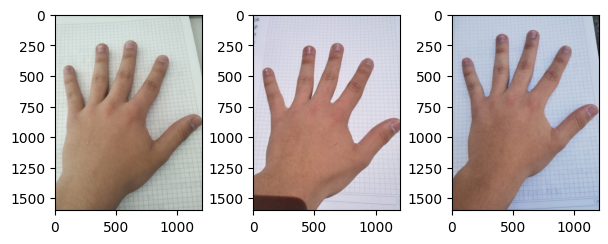

In [4]:
plt.subplot(131), plt.imshow(interior)
plt.subplot(132), plt.imshow(sol)
plt.subplot(133), plt.imshow(sombra)
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

Se puede apreciar que la definición de la segunda imágen es la mejor ya que fue tomada con la iluminación del Sol. 

In [5]:
interiorg= cv2.cvtColor(interior, cv2.COLOR_RGB2GRAY)
solg= cv2.cvtColor(sol, cv2.COLOR_RGB2GRAY)
sombrag= cv2.cvtColor(sombra, cv2.COLOR_RGB2GRAY)

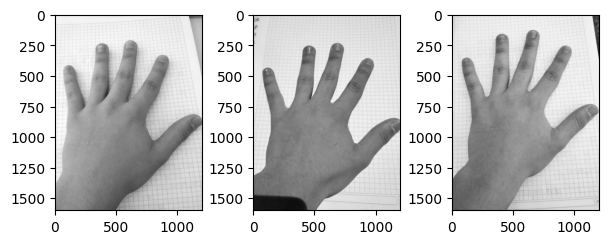

In [6]:
plt.subplot(131), plt.imshow(interiorg,cmap='gray')
plt.subplot(132), plt.imshow(solg,cmap='gray')
plt.subplot(133), plt.imshow(sombrag,cmap='gray')
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

En las imágenes en escala de grises se puede apreciar que la que fue tomada en el Sol, se acentúa la sombra de la cámara fotográfica y queda como un objeto completamente negro. Se espera que esto cambie las proporciones de inclinaciones del negro en el histograma.

--------------------------------2 bins--------------------------------
                     SIN NORMALIZAR                      /   NORMALIZADO       
               /int-sol      /int-sombra   /sol-sombra   /int-sol/int-sombra /sol-sombra
Correlacion    /1.00         /1.00         /1.00         /1.00   /1.00       /1.00   
Chi-Cuadrado   /45,520.38    /38,145.03    /209,850.31   /0.00   /0.00       /0.00   
Intersección   /1,798,724.00 /1,809,524.00 /1,681,848.00 /1.00   /1.00       /1.00   
Bhattacharyya  /0.06         /0.05         /0.11         /0.00   /0.00       /0.00   
--------------------------------8 bins--------------------------------
                     SIN NORMALIZAR                      /   NORMALIZADO       
               /int-sol      /int-sombra   /sol-sombra   /int-sol/int-sombra /sol-sombra
Correlacion    /0.90         /0.96         /0.80         /0.90   /0.96       /0.80   
Chi-Cuadrado   /2,020,483.73 /158,671.66   /6,654,054.79 /0.64   /0.20       /14.46  
Inte

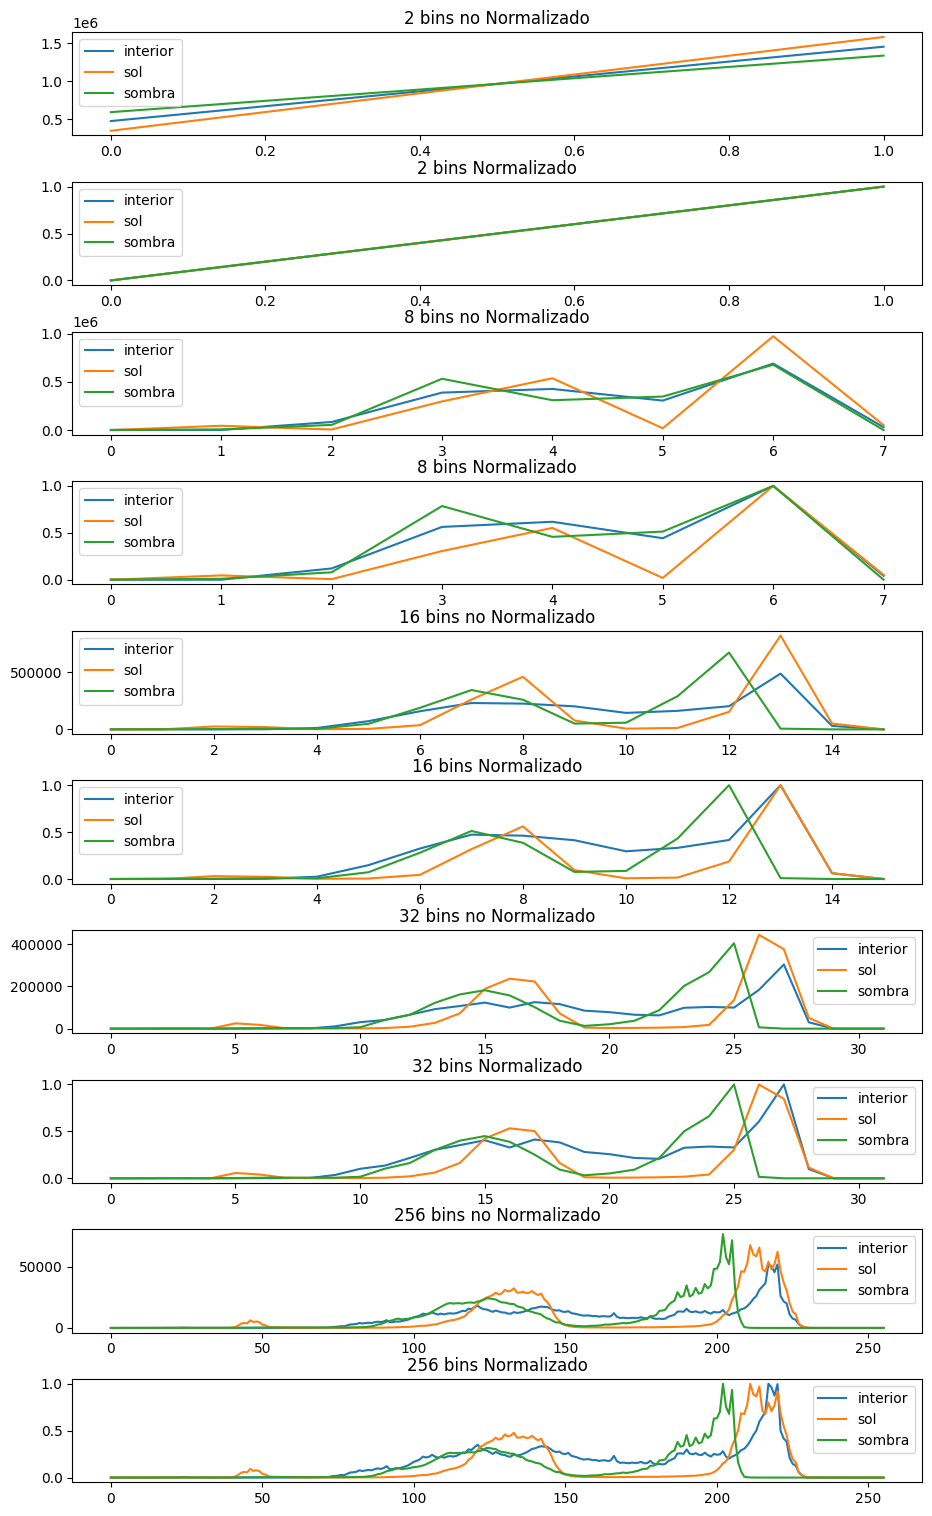

In [7]:
#hist = cv2.calcHist([imggray],[0],None, [16],[0,256])
bins=tuple([2,8,16,32,256])
comparadores=['Correlacion','Chi-Cuadrado','Intersección','Bhattacharyya']
#print(len(interiorg)**2)
nonorm=np.zeros((len(comparadores),3))
norm=np.zeros((len(comparadores),3))
#print(norm)
plt.figure(figsize=(10,10*len(bins)/5))
for i,bin in enumerate(bins):
    histint = cv2.calcHist([interiorg],[0],None, [bin],[0,256])
    histsol = cv2.calcHist([solg],[0],None, [bin],[0,256])
    histsombra = cv2.calcHist([sombrag],[0],None, [bin],[0,256])
    #print("!!!!!!!NO NORMALIZADO!!!!!!!")
    print("--------------------------------{} bins--------------------------------".format(bin))
    for j in range(len(comparadores)):
        #print('***Comparador {}***'.format(comparadores[j]))
        comp=cv2.compareHist(histint,histsol,j)
        nonorm[j][0]=comp
        #print('interior vs sol = {}'.format(comp))
        comp=cv2.compareHist(histint,histsombra,j)
        nonorm[j][1]=comp
        #print('interior vs sombra = {}'.format(comp))
        comp=cv2.compareHist(histsol,histsombra,j)
        nonorm[j][2]=comp
        #print('sol vs sombra = {}'.format(comp))

    plt.subplot(2*len(bins),1,2*i+1)
    plt.title('{} bins no Normalizado'.format(bin))
    plt.plot(histint,label="interior")
    plt.plot(histsol,label="sol")
    plt.plot(histsombra, label="sombra")
    plt.legend()
    #print("!!!!!!!NORMALIZADO!!!!!!!")
    for j in range(len(comparadores)):
        #print('***Comparador {}***'.format(comparadores[j]))
        cv2.normalize(histint, histint, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
        cv2.normalize(histsol, histsol, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
        cv2.normalize(histsombra, histsombra, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
        comp=cv2.compareHist(histint,histsol,j)
        norm[j][0]=comp
        #print('interior vs sol = {}'.format(comp))
        comp=cv2.compareHist(histint,histsombra,j)
        norm[j][1]=comp
        #print('interior vs sombra = {}'.format(comp))
        comp=cv2.compareHist(histsol,histsombra,j)
        norm[j][2]=comp
        #print('sol vs sombra = {}'.format(comp))
    print('{:<57}/{:<21}'.format('                     SIN NORMALIZAR','   NORMALIZADO'))
    print('{:<15}/{:<13}/{:<13}/{:<13}/{:<7}/{:<11}/{:<7}'.format(' ','int-sol','int-sombra','sol-sombra','int-sol','int-sombra','sol-sombra'))
    for j in range(len(comparadores)):
        print('{:<15}/{:<13,.2f}/{:<13,.2f}/{:<13,.2f}/{:<7,.2f}/{:<11,.2f}/{:<7,.2f}'.format(comparadores[j],nonorm[j][0],nonorm[j][1],nonorm[j][2]
                                                                    ,norm[j][0],norm[j][1],norm[j][2]))

    plt.subplot(2*len(bins),1,2*i+2)
    plt.title('{} bins Normalizado'.format(bin))
    plt.plot(histint,label="interior")
    plt.plot(histsol,label="sol")
    plt.plot(histsombra, label="sombra")
    plt.legend()
    #print(i,bin)

#plt.plot(hist)
plt.subplots_adjust(top=1.5, bottom=0.05, left=0.10, right=0.95, hspace=0.45, wspace=0.45)

A medida que el número de bins en el histograma aumenta se pude apreciar cómo los gráficos se aproximan más en forma.
En todos los casos no normalizados la gráfica de sol y de interior parecen estar desfasadas horizontalmente. Este desplazamiento de la sombra se da hacia la izquierda indicando que se hace corrimiento hacia el negro.
A medida que se aumenta en el número de bins, las gráficas de No Normalizado y normalizado evidencian diferencias en las alturas, indicando que aunque en un determinado intervalo se tenga un valor de pixeles, porcentualmente cambia respecto a las imágenes tomadas en sol, sombra y en interior

Para la gráfica de 256 bins, tanto normalizado como no normalizado, se tienen las tres con formas similares, con apariencia de efectos de corrimiento o compresión en algunas zonas.

Al comparar los histogramas con Correlación se encontraron valores perfectos para 2 bins entre las diferentes gráficas, sin importar si era normalizado o no, y se iba disminuyendo a medida que se aumentaban los bins. Para 256 bins se obtuvo un valor de 0.78 al comparar las gráficas de sol e interior. Las gráficas que menor ajuste tuvieron fueron las de sol y sombra, ya que a partir de los 16 bins los valores estaban alrededor de 0.15.

Para la prueba de Chi-Cuadrado, en donde valores de 0 indican una coincidencia perfecta, los valores obtenidos para todas las comparaciones entre gráficas no normalizadas fueron altos. Sin embargo, para valores normalizados los resultados estuvieron cercanos al 0, o de un orden muchísimo menor que el obtenido en la no normalizada. Por tanto, para este tipo de imágenes, en donde se tiene un cambio de iluminación, la normalización puede ser una estrategia para identificar si existe coincidencia o no de las imágenes.

Para el criterio de Intersección en donde, los valores de 0 indican desajuste total, y con histogramas normalizados, los valores de 1 indican pareja perfecta, se tiene que la coincidencia perfecta se consigue con 2 bins en normalizado y dichos valores van aumentando a medida que crece el número de bins. Por ejemplo, para 256 bins, los valores estaban cercanos a los 20 para las comparaciones entre interior/sol e interior/sombra. Los valores más pequeños en todos los casos de bins se encuentran al comparar la imagen de sol con la de sombra, indicando que existe una mayor ajuste. Así mismo, se tiene un menor ajuste en todos los casos entre las imágenes de interior y sol

Para el último crterio, Bhattacharyya, en donde el ajuste perfecta se da con valores de 0 y desajuste total en 1, se tiene, que a medida que aumentan los bins se pierde ajuste, llegando a valores de 0.38 para 256 bins. Para este indicador, no existe diferencia si se trabaja normalizado o no, ambos valores coinciden

# Conclusiones

Los histogramas nos ayudan gráficamente a identificar la correspondencia de ajuste de imágenes. Sin embargo, los criterios de Correlación, Chi-Cuadrado, Intersección y Bhattacharyya, brindan herramientas cuantitativas más concretas. 

Conociendo que las imágenes tienen el mismo objeto central y con cambios en iluminación, los criterios empleados no fueron contundentes en el match de las gráficas. Algunos criterios mejoran con el número de bins, otros con la diferencia entre iluminación.
 
